In [1]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
import pandas as pd
train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

In [3]:
train.head()
train.dtypes
train.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


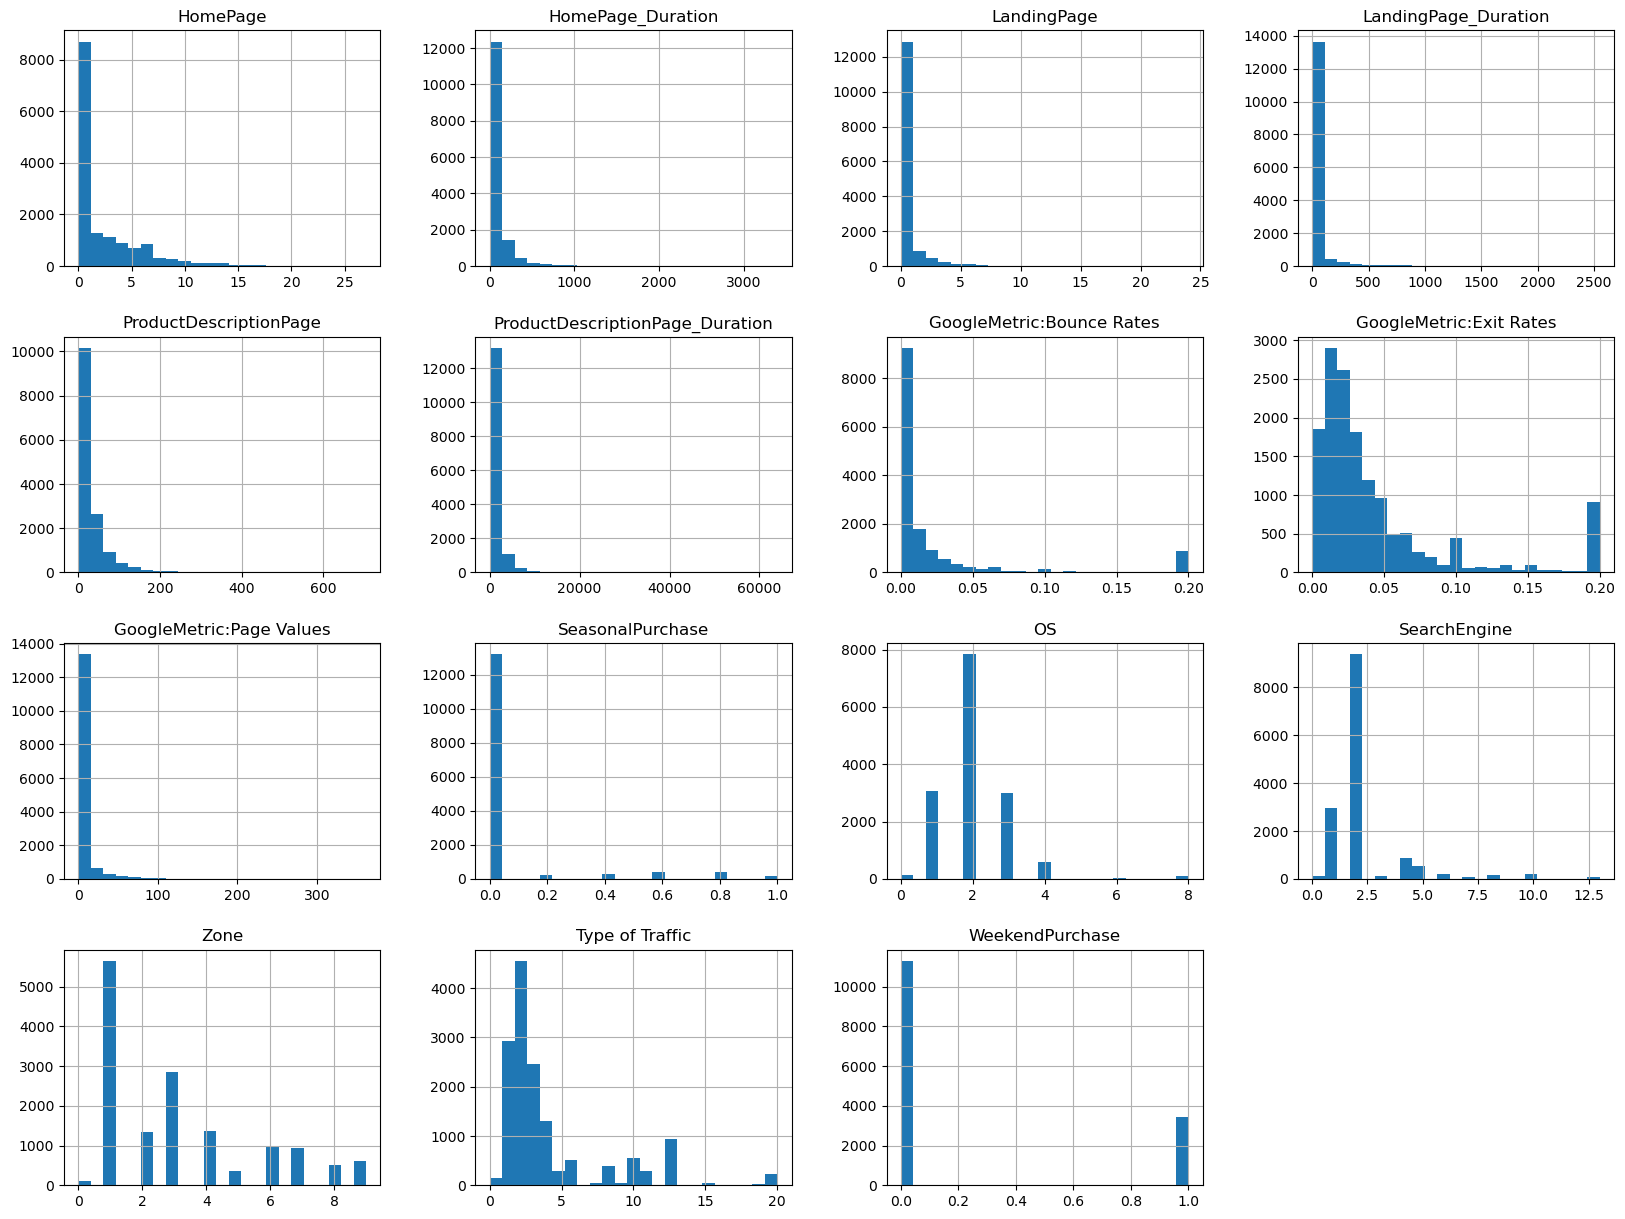

In [4]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = LogisticRegression(penalty='l2', C=0.1, random_state=42, solver='lbfgs', max_iter=1000)




train=train.select_dtypes(include = ['float64','bool'])
train.fillna(0,inplace = True)

from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
train.hist(bins=23,figsize=(20,15))

y_train = train['Made_Purchase']
x_train = train.drop(columns = ['Made_Purchase'])

# model = AdaBoostClassifier(n_estimators=80, learning_rate=0.01, random_state=42)
model = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='hard')


# model.fit(x_train, y_train)
model.fit(x_train, y_train)


y_pred = model.predict(x_train)

from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
test.select_dtypes(include=['float64','bool'])

test = test.select_dtypes(include=['float64','bool'])
test.fillna(0,inplace=True)

prediction = model.predict(test)


sample=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")
sample.head()

submission=pd.DataFrame(columns=['id','Made_Purchase'])
submission['id']=[i for i in range (len(prediction))] 
submission['Made_Purchase']=prediction
submission.to_csv('submission.csv', index=False)
submission.head()